# Popular Data Science Questions

In this project we explore Data Science Stack Exchange (DSSE), a data science dedicated site from Stack Exchange to figure out what is best data sciene content to write about.

## Stack Exchange:

#### What kind of questions are welcome on this site?
According to the help center, the questions must be:
    - practical about Data Science. 
    - relevant to others.
    - avoid subjective questions.

#### What, other than questions, does the site's home subdivide into?
On the home page we can see that we have four sections:

    - Questions — a list of all questions asked;
    - Tags — a list of tags (keywords or labels that categorize questions);
    - Users — a list of users;
    - Unanswered — a list of unanswered questions.

The most useful way to help us answer our question is the tagging system. It will be very useful in categorizing content, saving us the trouble of having to do it ourselves.

#### What information is available in each post?
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
    - How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags.

## Stack Exchange Data Explorer:

Upon exploring the DSSE's query, We find that Posts' table look the most promising towards finding the most popular content. We'll be able to count how many questions was asked for each tag. 

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).


## Getting the Data

We're only looking to get data for 2019. To get the relevant data, we'll run this query on DESE's query:


## Exploring the Data

In [1]:
# importing everything that we'll use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# making sure datetime object is stored by "CreationDate"
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
# let's try and find more information about our dataframe
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


The only column that was missing values is "FavoriteCount". This just mean that the post wasn't in anyone's favorite list. We'll go ahead and replace those missing values with zeros.

The types seem adequate for every column.
Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

## Cleaning the Data:

In [4]:
# We'll transform the orignal Tags strings to something easier to work with

questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5224,62658,2019-11-04 15:22:32,4,937,"[tensorflow, nlp, pytorch, bert]",2,3.0
60,55908,2019-07-18 09:26:20,0,11,"[python, nlp, encoding, parallel, processing]",0,NaN
1616,57555,2019-08-14 15:33:52,2,33,"[machine-learning, random-forest]",1,NaN


In [5]:
# fill the missing values with 0
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.


In [6]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [7]:
# Create visualizations for the top tags of each of the above results.
# we first need to transform tag_count to a dataframe and sort it.

tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


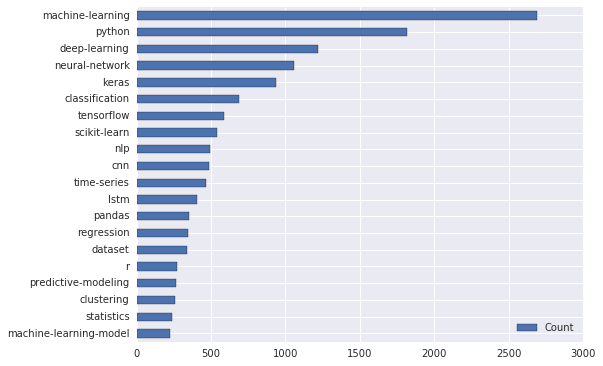

In [8]:
most_used.plot(kind="barh", figsize=(8,6))

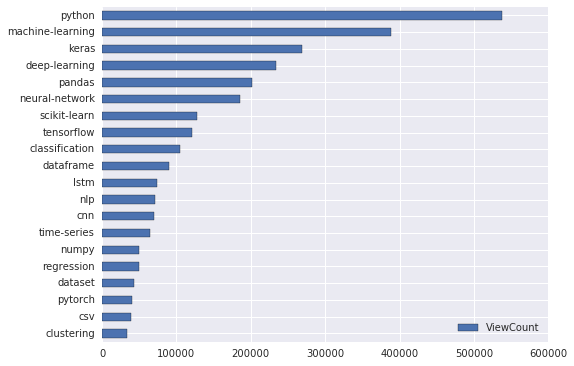

In [9]:
# getting top 10 viewed tags using pandas.DataFrame.iterrows()

tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(8,6))

Let's take a look at these two graphs side by side

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc499cf0198>],
      dtype=object)

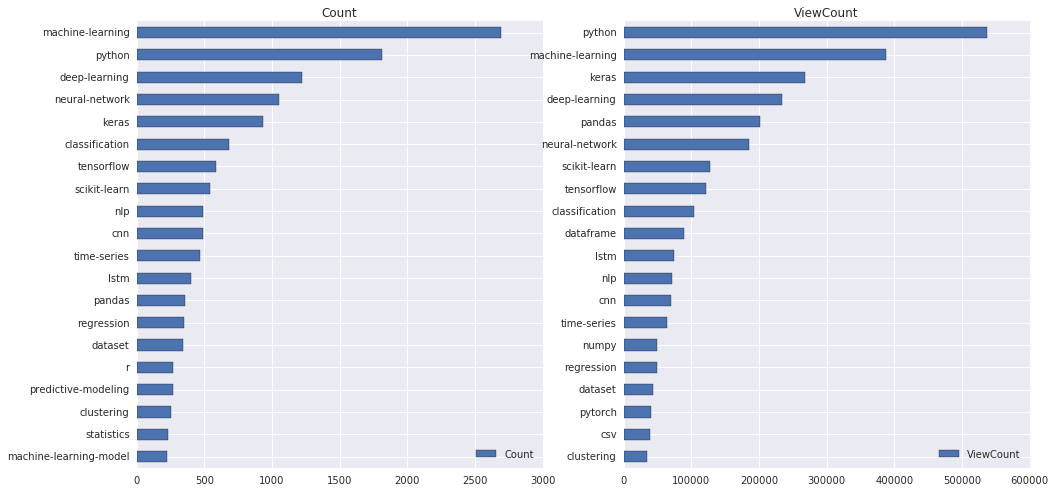

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((16, 8))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

## Relations Between Tags

Let's see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.

In [11]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [12]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


These tables tell us that: 
    The tags present in most_used and not present in most_viewed are:
       - machine-learning-model
       - statistics
       - predictive-modeling
       - r
    The tags present in most_viewed but not in most_used are:
       - csv
       - pytorch
       - dataframe
       
Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like pandas and r:       
       


In [13]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


In [14]:
# Create a dataframe with rows and columns representing the Tags
all_tags = list(tag_count.index)

all_tags = pd.DataFrame(index=tag_count.index, columns=tag_count.index)
all_tags.head()

,image-preprocessing,fuzzy-logic,domain-adaptation,experiments,cross-validation,svm,programming,machine-learning,infographics,history,...,theory,collinearity,cloud-computing,arima,overfitting,boosting,bigdata,categories,difference,state-of-the-art
image-preprocessing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuzzy-logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain-adaptation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experiments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cross-validation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# fill NaN with zeros
all_tags.fillna(0,inplace=True)
all_tags.head(4)

,image-preprocessing,fuzzy-logic,domain-adaptation,experiments,cross-validation,svm,programming,machine-learning,infographics,history,...,theory,collinearity,cloud-computing,arima,overfitting,boosting,bigdata,categories,difference,state-of-the-art
image-preprocessing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fuzzy-logic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
domain-adaptation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
experiments,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
for tags in questions["Tags"]:
    all_tags.loc[tags,tags] +=1
all_tags.head(4)

,image-preprocessing,fuzzy-logic,domain-adaptation,experiments,cross-validation,svm,programming,machine-learning,infographics,history,...,theory,collinearity,cloud-computing,arima,overfitting,boosting,bigdata,categories,difference,state-of-the-art
image-preprocessing,67,0,0,0,0,0,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
fuzzy-logic,0,13,0,0,0,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
domain-adaptation,0,0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
experiments,0,0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
most_used_tags = all_tags.loc[most_used.index, most_used.index]
most_used_tags

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [18]:
def highlight_max(data):
    '''
    highlight the second largest value in each row in the DataFrame
    '''
    attr = 'background-color: {}'.format("yellow")
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.nlargest(2).values[-1]
        return [attr if v else '' for v in is_max]

most_used_tags.style.apply(highlight_max,axis=1)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [20]:
most_viewed_tags = all_tags.loc[most_viewed.index, most_viewed.index]
most_viewed_tags.style.apply(highlight_max,axis=1)


# f, ax = plt.subplots(figsize=(50, 30))
# sns.heatmap(most_viewed_tags, annot=True, fmt="d", linewidths=.5, ax=ax, )

,clustering,csv,pytorch,dataset,regression,numpy,time-series,cnn,nlp,lstm,dataframe,classification,tensorflow,scikit-learn,neural-network,pandas,deep-learning,keras,machine-learning,python
clustering,257,0,0,5,2,1,20,0,9,3,0,12,0,24,8,5,2,0,61,45
csv,0,27,0,4,0,1,2,0,0,0,3,1,0,0,0,11,1,2,3,17
pytorch,0,0,175,3,4,1,3,19,9,11,0,2,18,2,26,0,41,12,25,41
dataset,5,4,3,340,6,3,6,11,11,7,4,28,9,9,20,14,32,13,99,53
regression,2,0,4,6,347,1,24,6,2,11,0,34,9,37,42,6,21,31,119,59
numpy,1,1,1,3,1,117,4,2,0,1,3,4,13,12,11,35,10,11,24,71
time-series,20,2,3,6,24,4,466,8,0,87,0,25,9,12,33,19,44,51,131,105
cnn,0,0,19,11,6,2,8,489,7,24,0,20,57,0,118,1,160,116,124,62
nlp,9,0,9,11,2,0,0,7,493,19,0,35,11,12,24,3,72,23,113,71
lstm,3,0,11,7,11,1,87,24,19,402,0,20,43,2,69,7,103,133,71,61


From the data above, the most viewed tags in Data Science Stack Exchange is also *python and machine-learning*. And most most-used tags are also most-viewed. 

In general, the most popular pair of tags in Data Science Stack Exchange is *python and machine-learning*.

## Domain Knowledge

From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.
Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.
